<a href="https://colab.research.google.com/github/robertomoragad/Estadistica/blob/master/ejercicios_intervalos_de_confianza_para_medias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos Librerias para nuestros ejercicios la siguiente forma: 
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import matplotlib.pyplot as plt #importando matplotlib

**Vamos a ejercitar intervalos de confianza para la media poblacional**

<img src='https://drive.google.com/uc?export=view&id=1eme-xoJHHrRm4IvgDoPaAL_N7oErlLHn' width="800" align="left" style="margin-right: 20px"> 
<br>

<p style="font-size:8pt"> 
Imagen gentileza de: Roberto Moraga</p>

1) Se extrajo una muestra aleatoria de 172 clientes de la nueva APP de compras "cornerTop", y se les pidió que recordaran  su última experiencia de compra para evaluar el servicio recibido en una escala de 1 (muy insatisfecho) a 5 (muy satisfecho).
La satisfacción de los clientes recibió una calificación media de 4,38 con una desviación std. muestral de 0,70.

a) Calcular un Intervalo de confianza del 95% para la media poblacional.

b) Calcular un Intervalo de confianza del 99% para la media poblacional.

In [2]:
#como n >= 30 aplicaremos Z (Distribucion normal estandadarizada)

#Caso NC = 0.95
#primero registrar los datos

n= 172
xbar = 4.38
S = 0.7

# IC con NC 95%
NC = 0.95
alpha = 1-NC
alpha_medio = alpha/2

#Calcular Z con la función de distribucion normal acumulada inversa (ppf)
Z = stats.norm.ppf(1 - alpha_medio)
print("Z", Z)

LI = xbar - Z *(S / np.sqrt(n))
LS = xbar + Z *(S / np.sqrt(n))

print('IC al ',NC, ' para media poblacional: ',(LI,LS))


Z 1.959963984540054
IC al  0.95  para media poblacional:  (4.275387903058986, 4.484612096941014)


In [4]:
#Forma simple con Scipy
IC95 = stats.norm.interval(NC, loc = xbar, scale = S /np.sqrt(n))
print('IC al', NC, 'para media poblacional: ', IC95)

IC al 0.95 para media poblacional:  (4.275387903058986, 4.484612096941014)


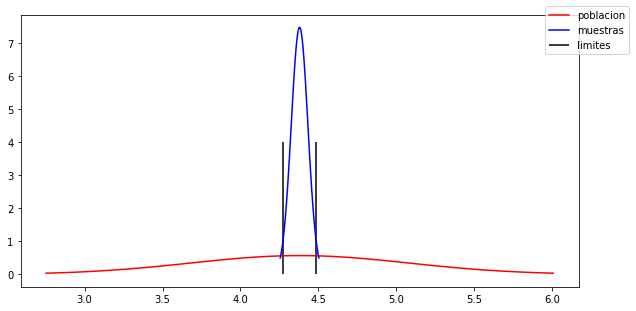

0.9750000000000001


In [6]:
#Graficando la distribucion normal de poblacion y medias

n= 172
xbar = 4.38
S = 0.7
S_xbar = S / np.sqrt(n)


#proyectar distribucion poblacion
poblacion = stats.norm(xbar, S)
x = np.linspace(poblacion.ppf(0.01), poblacion.ppf(0.99), 100)
pdf = poblacion.pdf(x) #funcion densidad probabilidad

#proyectar distribucion medias n=172
medias = stats.norm(xbar, S_xbar)
x_m = np.linspace(medias.ppf(0.01), medias.ppf(0.99), 100)
pdf_m = medias.pdf(x_m) #funcion densidad probabilidad

plt.figure(figsize=(10, 5)) #tamaño grafico
plt.plot(x, pdf,"r") #poblacion fit
plt.plot(x_m, pdf_m,"b", ) #medias fit
plt.vlines(ymin=0, ymax=4, x=LI)#LI IC
plt.vlines(ymin=0, ymax=4, x=LS)#LS IC
plt.legend(['poblacion','muestras', 'limites'],bbox_to_anchor=(1.1,1.05))
plt.show()


#calcular probabilidad de tomar una muestra y esta tenga una media menor al LS del IC
prob_acum_LS = stats.norm(xbar, S_xbar).cdf(LS)
print(prob_acum_LS)

In [ ]:
#aplicar aquí para caso al 99%

#su codigo aqui



Su conclusión aquí: ...............



---


2) La empresa de transporte DUDU planea importar una flota de nuevos taxis para sus conductores. La decisión depende de si el rendimiento del auto en consideración es por lo menos 27,5 MPG (millas por galon).
Los 36 autos que prueba la empresa reportarn una media de 25,6 MPG, con una desviación std. muestral de 3,5 MPG.

a) A un nivel de confianza del 99% ¿qué aconsejaría a la empresa que hiciera?


In [9]:
#como n >= 30 aplicaremos Z

#Caso al 99%
#primero registrar los datos

n= 36
xbar = 25.6
S = 3.5

# IC con NC 99%
NC = 0.99
alpha = 1-NC
alpha_medio = alpha/2

#Calcular Z con la función de distribucion normal acumulada inversa (ppf)
Z = stats.norm.ppf(1 - alpha_medio)
print('Z: ', Z)

LI = xbar - Z *(S / np.sqrt(n))
LS = xbar + Z *(S / np.sqrt(n))

print('IC al ',NC, ' para media poblacional: ',(LI,LS))


Z:  2.5758293035489004
IC al  0.99  para media poblacional:  (24.097432906263144, 27.10256709373686)


In [10]:
#Forma simple con Scipy (no es necesario sacar alpha/2)
IC95 = stats.norm.interval(NC, loc = xbar, scale = S /np.sqrt(n))
print('IC al', NC, 'para media poblacional: ', IC95)


IC al 0.99 para media poblacional:  (24.097432906263144, 27.10256709373686)


Su conclusión aqui: ....................

In [ ]:
#graficar aqui la distribucion de la poblacion y de las medias



In [ ]:
#si nos dicen que el sigma poblacional es 0.11
#calcular el IC con el mismo nivel de significancia anterior




---


3) Un artículo publicado en el Journal of Heat Transfer (Trans ASME, Ses. C, 96 1974, pag 59) describe un nuevo método para medir la conductividad térmica del hierro Armco.  Al utilizar una temperatura de 100ºF y una potencia de entrada de 550 W, se obtienen las diez mediciones siguientes de conductividad térmica (en BTU/hr-ft-ºF): 
conductividad = (41.6, 41.48, 42.34, 41.95, 41.86, 42.18, 41.72, 42.26, 41.81, 42.04)

a) Se desea construir un IC del 95% para conductividad térmica promedio de ese material, se sabe que la desviación tipica es de 0,30 Btu/hr-ft-ºF

In [14]:
# n < 30, pero se conoce la desv. std poblacional, por tanto aplicar Z

#Datos 10 mediciones
conductividad = (41.6, 41.48, 42.34, 41.95, 41.86, 42.18, 41.72, 42.26, 41.81, 42.04)

#primero registrar los datos

n= np.size(conductividad)
xbar = np.mean(conductividad)
S = np.std(conductividad, ddof=1) # divide en n-1 para sacar desv. std insesgada
sigma = 0.30 #esta es la desv. std poblacional y es conocida!!

# IC con NC 95%
NC = 0.95
alpha = 1-NC
alpha_medio = alpha/2

#Calcular Z con la función de distribucion normal acumulada inversa (ppf)
Z = stats.norm.ppf(1 - alpha_medio)
print('Z: ', Z)

LI = xbar - Z *(sigma / np.sqrt(n))
LS = xbar + Z *(sigma / np.sqrt(n))

print('IC al ',NC, ' para media poblacional: ',(LI,LS))



Z:  1.959963984540054
IC al  0.95  para media poblacional:  (41.73806149030863, 42.10993850969137)


In [15]:
#Forma simple con Scipy
IC95 = stats.norm.interval(NC, loc = xbar, scale = sigma /np.sqrt(n))
print('IC al', NC, 'para media poblacional: ', IC95)

IC al 0.95 para media poblacional:  (41.73806149030863, 42.10993850969137)




---


4) Un artículo públicado en el Journal of testing and Evaluation presenta las siguientes 20 mediciones del tiempo de combustión residual (en segundos) de especimenes tratados de ropa de dormir para niños:

tiempo = (9.85, 9.93, 9.75, 9.77, 9.67, 9.87, 9.67, 9.94, 9.85, 9.75, 9.83, 9.92, 9.74, 9.99, 9.88, 9.95, 9.95, 9.93, 9.92, 9.89)

a) Se desea encontrar un IC del 95% para el tiempo de combustion residual promedio.

In [17]:
# n < 30, y se desconoce la desv. std poblacional, por tanto aplicar T (distribucion de Student)

#Datos 20 mediciones
tiempo = (9.85, 9.93, 9.75, 9.77, 9.67, 9.87, 9.67, 9.94, 9.85, 9.75, 9.83, 9.92, 9.74, 9.99, 9.88, 9.95, 9.95, 9.93, 9.92, 9.89)

#primero registrar los datos
n= np.size(tiempo)
xbar = np.mean(tiempo)
S = np.std(tiempo, ddof=1) # divide en n-1 para sacar desv. std insesgada
#sigma = ? # aca no la conocemos

# IC con NC 95%
NC = 0.95
alpha = 1-NC
alpha_medio = alpha/2

#Calcular T con la función de distribucion T acumulada inversa (ppf)
T = stats.t.ppf(1-alpha_medio, df=(n-1))# n-1 grados de libertad
print('T: ', T)

LI = xbar - T *(S / np.sqrt(n))
LS = xbar + T *(S / np.sqrt(n))

print('IC al ',NC, ' para media poblacional: ',(LI,LS))


T:  2.093024054408263
IC al  0.95  para media poblacional:  (9.807356747695982, 9.897643252304013)


In [18]:
#Forma simple con Scipy
IC95 = stats.t.interval(NC, n-1, loc=xbar, scale=S /np.sqrt(n)) 

print('IC al', NC, 'para media poblacional: ', IC95)


IC al 0.95 para media poblacional:  (9.807356747695982, 9.897643252304013)


**Guia para STATS**

pdf: Probability Density Function

cdf: Cumulative Distribution Function

sf: Survival Function (1-CDF)

ppf: Percent Point Function (Inverse of CDF)

isf: Inverse Survival Function (Inverse of SF)

https://docs.scipy.org/doc/scipy/reference/stats.html
